In [1]:
import pandas as pd
import numpy as np

# COVID-19 data

Total

In [2]:
world_ts = pd.read_csv('output_data/time_series/ts-world-covid19.csv')
world_ts['Date_Confirmed'] = pd.DatetimeIndex(world_ts['Date_Confirmed'])
world_ts = world_ts[['Date_Confirmed','China','Italy','Spain','United Kingdom','Korea, South','US','Mexico']]

In [3]:
mexico_ts = pd.read_csv('output_data/time_series/ts-mexico-covid19.csv')
mexico_ts['Date_Confirmed'] = pd.DatetimeIndex(mexico_ts['Date_Confirmed'])
mexico_ts['Mexico_SS'] = mexico_ts.sum(axis=1) # Sum rows for Mexico total (Secretaría de Salud)

Daily

In [4]:
world_daily = pd.read_csv('output_data/time_series/daily-world_covid19.csv')
world_daily['Date_Confirmed'] = pd.DatetimeIndex(world_daily['Date_Confirmed'])
world_daily = world_daily[['Date_Confirmed','China','Italy','Spain','United Kingdom','Korea, South','US','Mexico']]

In [5]:
mexico_daily = pd.read_csv('output_data/time_series/daily-mexico-covid19.csv')
mexico_daily['Date_Confirmed'] = pd.DatetimeIndex(mexico_daily['Date_Confirmed'])
mexico_daily['Mexico_SS'] = mexico_daily.sum(axis=1) # Sum rows for Mexico total (Secretaría de Salud)

# Tables

In [7]:
import janitor

In [8]:
# Only sensible way to filter data smh
world_ts = world_ts.filter_date('Date_Confirmed','2020-02-15','2020-04-16')
mexico_ts = mexico_ts.filter_date('Date_Confirmed','2020-02-15','2020-04-16')
world_daily = world_daily.filter_date('Date_Confirmed','2020-02-15','2020-04-16')
mexico_daily = mexico_daily.filter_date('Date_Confirmed','2020-02-15','2020-04-16')

In [9]:
ts_totals = world_ts.merge(mexico_ts, on='Date_Confirmed', how='outer')
ts_totals = ts_totals.fillna(method='ffill') # First fill missing time series totals with previous row value
ts_totals = ts_totals.replace(0, np.nan) # Now convert 0 to NaN

In [10]:
ts_daily = world_daily.merge(mexico_daily, on='Date_Confirmed', how='outer')

In [11]:
ts_totals.to_csv('output_data/time_series/totals.csv', index=False)
ts_daily.to_csv('output_data/time_series/daily.csv', index=False)

# Plots

In [12]:
from numpy import *
import math
import matplotlib.pyplot as plt

### Growth rate

#### World

In [18]:
ts_totals.tail()

,Date_Confirmed,China,Italy,Spain,United Kingdom,"Korea, South",US,Mexico,AGUASCALIENTES,BAJA CALIFORNIA,...,SAN LUIS POTOSI,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATAN,ZACATECAS,Mexico_SS
57,2020-04-12,2519.0,156363.0,166831.0,7746.0,10512.0,555313.0,4219.0,37.0,64.0,...,26.0,92.0,33.0,72.0,27.0,21.0,20.0,62.0,11.0,1913.0
58,2020-04-13,2522.0,159516.0,170099.0,8143.0,10537.0,580619.0,4661.0,73.0,175.0,...,46.0,179.0,74.0,132.0,48.0,42.0,41.0,128.0,19.0,3740.0
59,2020-04-14,2524.0,162488.0,172541.0,8622.0,10564.0,607670.0,5014.0,80.0,201.0,...,50.0,201.0,84.0,144.0,52.0,46.0,44.0,144.0,20.0,4140.0
60,2020-04-15,2526.0,165155.0,177644.0,9044.0,10591.0,636350.0,5399.0,87.0,232.0,...,54.0,231.0,94.0,159.0,57.0,50.0,48.0,160.0,21.0,4600.0
61,2020-04-16,2527.0,168941.0,184948.0,9468.0,10613.0,667801.0,5847.0,95.0,262.0,...,57.0,264.0,105.0,171.0,63.0,54.0,52.0,179.0,22.0,5079.0


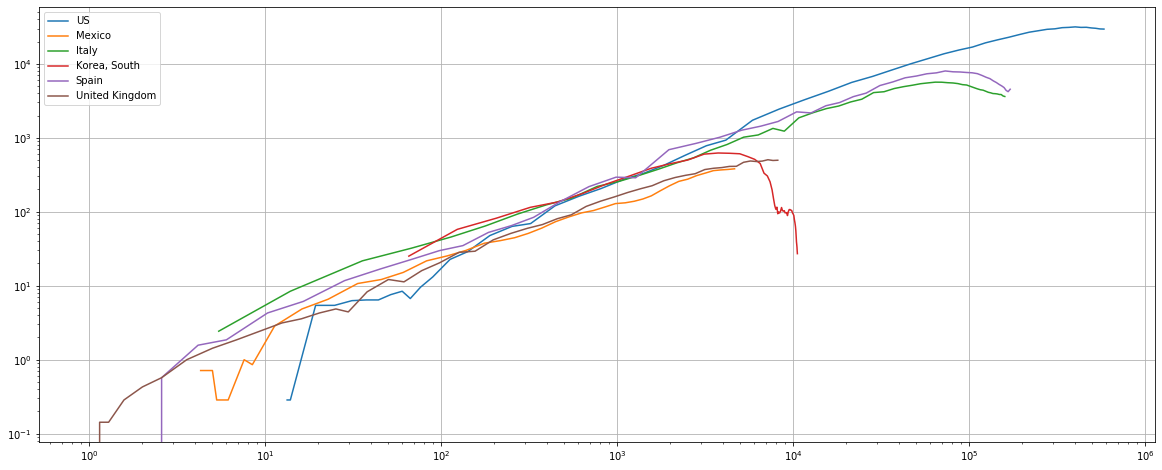

In [13]:
plt.figure(figsize=(20,8))

for region in ['US','Mexico','Italy','Korea, South','Spain','United Kingdom']:
    plt.plot(list(ts_totals[region].rolling(window=7).mean()), list(ts_daily[region].rolling(window=7).mean()), label=region)

plt.legend()
plt.grid(True)

plt.yscale('log')
plt.xscale('log')

plt.show()

#### World + Mexico states

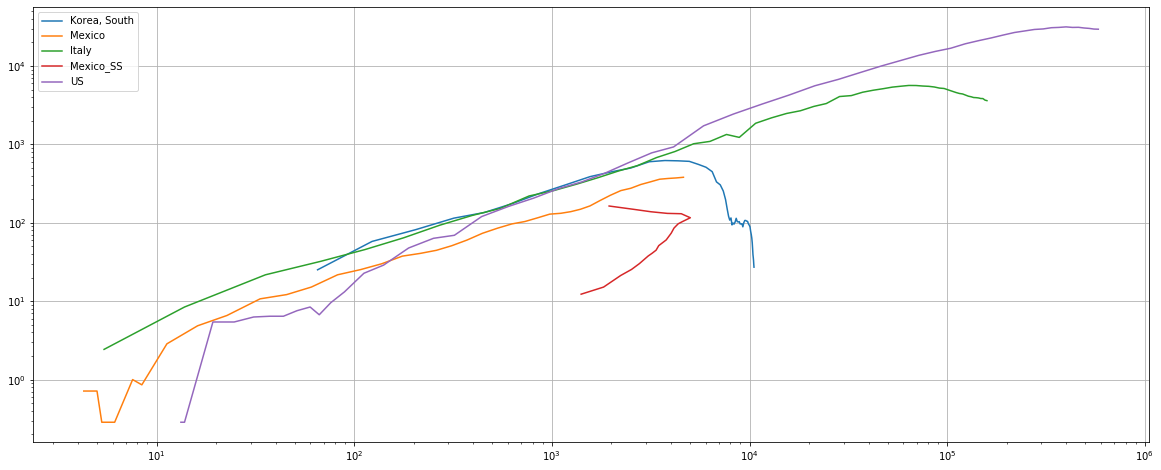

In [14]:
plt.figure(figsize=(20,8))

for state in ['Korea, South','Mexico','Italy','Mexico_SS','US']:
    plt.plot(list(ts_totals[state].rolling(window=7).mean()), list(ts_daily[state].rolling(window=7).mean()), label=state)

plt.legend()
plt.grid(True)

plt.yscale('log')
plt.xscale('log')

plt.show()

#### Mexico states

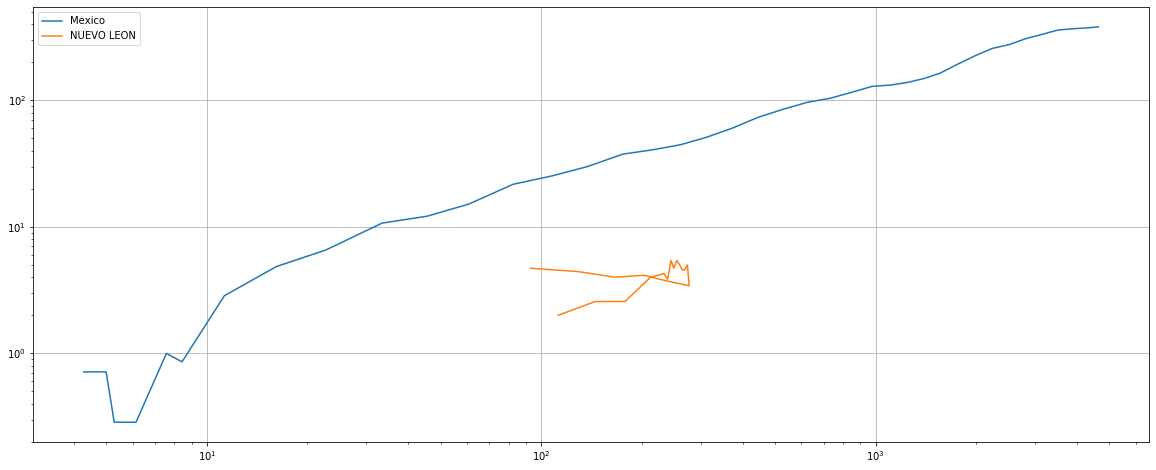

In [27]:
plt.figure(figsize=(20,8))

for state in ['Mexico','NUEVO LEON']:
    plt.plot(list(ts_totals[state].rolling(window=7).mean()), list(ts_daily[state].rolling(window=7).mean()), label=state)

plt.legend()
plt.grid(True)

plt.yscale('log')
plt.xscale('log')

plt.show()

In [ ]:
ts_totals